## Assessing Campaign Performance Using Chi-Square Test For Independence
AB Testing - Theory & Application

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

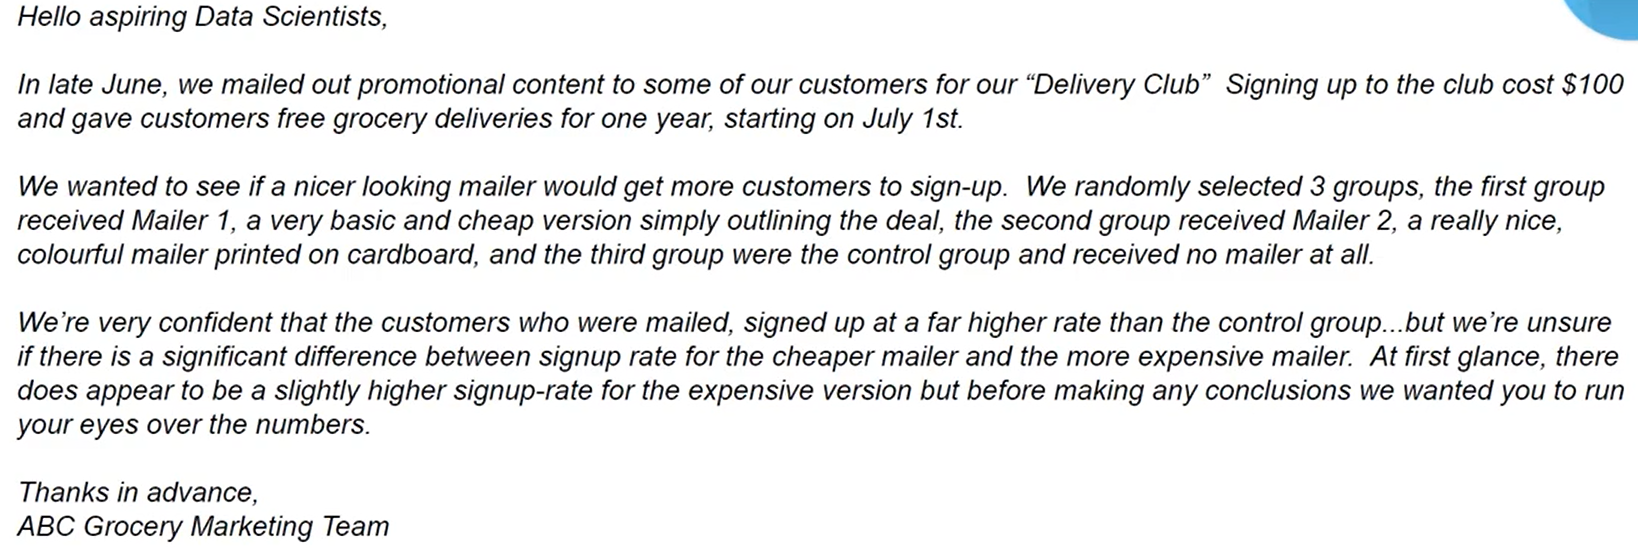

In [9]:
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/ABTesting/grocery_database.xlsx"

In [21]:
# the difference in sign up rates with the different email service 
# response being binary as in did sign up or did not sign up
campaign_data = pd.read_excel(data_path, sheet_name = 'campaign_data') 
print(campaign_data.shape)
campaign_data.head(30)
 

(870, 5)


,customer_id,campaign_name,campaign_date,mailer_type,signup_flag
0,74,delivery_club,2020-07-01,Mailer1,1
1,524,delivery_club,2020-07-01,Mailer1,1
2,607,delivery_club,2020-07-01,Mailer2,1
3,343,delivery_club,2020-07-01,Mailer1,0
4,322,delivery_club,2020-07-01,Mailer2,1
5,115,delivery_club,2020-07-01,Mailer2,0
6,1,delivery_club,2020-07-01,Mailer2,1
7,120,delivery_club,2020-07-01,Mailer1,1
8,52,delivery_club,2020-07-01,Mailer1,1
9,405,delivery_club,2020-07-01,Mailer1,0


In [22]:
# filter our data not to have the 'control' as mailer type

filtered_camp_data = campaign_data.loc[campaign_data['mailer_type'] != 'Control']
print(filtered_camp_data.shape)
filtered_camp_data.head(30)


(711, 5)


,customer_id,campaign_name,campaign_date,mailer_type,signup_flag
0,74,delivery_club,2020-07-01,Mailer1,1
1,524,delivery_club,2020-07-01,Mailer1,1
2,607,delivery_club,2020-07-01,Mailer2,1
3,343,delivery_club,2020-07-01,Mailer1,0
4,322,delivery_club,2020-07-01,Mailer2,1
5,115,delivery_club,2020-07-01,Mailer2,0
6,1,delivery_club,2020-07-01,Mailer2,1
7,120,delivery_club,2020-07-01,Mailer1,1
8,52,delivery_club,2020-07-01,Mailer1,1
9,405,delivery_club,2020-07-01,Mailer1,0


In [25]:
# summarize to get our observed frequency
observed_values = pd.crosstab(filtered_camp_data['mailer_type'], 
                              filtered_camp_data['signup_flag']).values
print(observed_values.shape)
print(observed_values)

(2, 2)
[[252 123]
 [209 127]]


In [39]:
# obtaining the signup rates
# mailer1_signuprate = 123/(252 + 123)
mailer1_signuprate = observed_values[0][1]/(observed_values[0][0] + observed_values[0][1])
# mailer2_signuprate = 127/(209 + 127)
mailer2_signuprate = observed_values[1][1]/(observed_values[1][0] + observed_values[1][1])
print(mailer1_signuprate,mailer2_signuprate)


0.328 0.37797619047619047


Stating the hypothesis test and the allowed acceptance criteria. Ensure with the team the criteria is acceptable.

In [40]:
# state hypothesis and set acceptance criteria 
null_hypothesis = 'there is no relationship between mailer type and signup rate. they are independent'
alternate_hypothesis = 'there is a relationship between mailer type and signup rate. they are not independent'
acceptance_criteria = .05

In [41]:
# calculate expected frequencies and chi square statistic
chi2_statistic, p_value, dof, expected_values = chi2_contingency(observed_values, correction=False)
print(chi2_statistic,p_value)

1.9414468614812481 0.16351152223398197


In [42]:
# find the critical value for this test 
critical_value = chi2.ppf(1-acceptance_criteria, dof)
print(critical_value)

3.841458820694124


In [43]:
# print results of statistics
if chi2_statistic >= critical_value:
    print(f"as our chi-square statistic of {chi2_statistic} is higher than our critical value of {critical_value} - we reject the null hypothesis, and conclude that: {alternate_hypothesis}")
else:
    print(f"as our chi-square statistic of {chi2_statistic} is lower than our critical value of {critical_value} - we retain the null hypothesis, and conclude that: {null_hypothesis}")

as our chi-square statistic of 1.9414468614812481 is lower than our critical value of 3.841458820694124 - we retain the null hypothesis, and conclude that: there is no relationship between mailer type and signup rate. they are independent


In [44]:
# print results of statistics as p value
if p_value <= acceptance_criteria:
    print(f"as our p-value statistic of {p_value} is lower than our acceptance criteria of {acceptance_criteria} - we reject the null hypothesis, and conclude that: {alternate_hypothesis}")
else:
    print(f"as our p-value statistic of {p_value} is higher than our acceptance criteria  of {acceptance_criteria} - we retain the null hypothesis, and conclude that: {null_hypothesis}")

as our p-value statistic of 0.16351152223398197 is higher than our acceptance criteria  of 0.05 - we retain the null hypothesis, and conclude that: there is no relationship between mailer type and signup rate. they are independent


we can go back to the mailer team and say that they should not take any hard conclusions to the different mailers performed. 

if not the business would have spent much more on the different options of the mailer